Contents
---
- [Datetime Review](#datetime)
- [JSON](#json)
- [APIs](#APIS)
- [OAuth](#oauth)

In the previous units, we used the requests and BeautifulSoup packages to scrape data off of websites. This (as you found out) can be rather slow and messy. Preferably, if a website has a public API, you can obtain information from them directly, without needing to go to a website. An API is specifically built for developers, by developers, in order to obtain the application's data. 

Instead of making http requests to a company's website, you will make http requests to a company's API. Some of the basic http requests are "get" and "post", as in get information or post information. You've already used get in the last chapter (requests.get(url)) to get information. We can also use http post requests to send information (as in sending out a tweet).

Time data obtained from an API will be important to us (for example, trying to figure out what time Donald Trump tweets most often), so we'll do a quick review of the Datetime package. 

APIs typically send us information in JSON (JavaScript Object Notation) format, so we'll learn about that, too.

Firstly, though, we'll do a quick review of datetime, as you'll probably want to analyze time info when working with the Twitter API.

Datetime
---
<a class="anchor" id="datetime"></a>
Often, we may be interested in gathering date and time info. The package datetime allows us to work with these more easily. Suppose you wanted to make a datetime object of your birthday, Sept. 27 1983. You'll need to enter first the year, then the month, then the date:

In [6]:
import datetime
birthday = datetime.datetime(1983, 9, 27)
print(birthday)

1983-09-27 00:00:00


In particular, if you wanted today's date, you could type:

In [7]:
today = datetime.datetime.now()
print(today)

2019-05-16 10:14:55.995587


If you wanted to just extract the hour, month, year, etc. you could type:

In [8]:
today.hour

10

In [9]:
today.month

5

In [10]:
today.year

2019

Suppose you are interested in analyzing Donald Trump's tweeting habits. You would need to take in the way that Twitter stores times of tweets and then manipulate it. Twitter stores time in UTC form. For example, a tweet is stored as "created_at":"Wed Aug 27 13:08:45 +0000 2008". What if wanted to plot his number of tweets versus day of the week? Or the number of tweets versus time of day? We'll want to extract pieces of this UTC form. To do this, we'll use datetime.

First, we'll turn a string into a datetime object using strptime:

In [11]:
from datetime import datetime

tweet = "Wed Aug 27 13:08:45 +0000 2008"

time_info = datetime.strptime(tweet,'%a %b %d %H:%M:%S +%f %Y')

print(time_info)
print(type(time_info))

2008-08-27 13:08:45
<class 'datetime.datetime'>


What are all of those % letters? They specify what type of data it is (year, month, day, hour, etc.) You can find all of the abbreviations here: http://strftime.org/


If we want to extract just pieces of the time of a datetime object, we can do that with strftime:

In [12]:
from datetime import datetime

tweet = "Wed Aug 27 13:08:45 +0000 2008"
time_info = datetime.strptime(tweet,'%a %b %d %H:%M:%S +%f %Y')

print('Day of week: ', time_info.strftime("%a"))
print('Hour: ', time_info.strftime("%H"))
print('Year: ', time_info.strftime("%Y"))

Day of week:  Wed
Hour:  13
Year:  2008


As another example, suppose you had a date "12-03-97" that you wanted to convert to a datetime object and then extract the word for the month. You would type:

In [13]:
from datetime import datetime

mydate = datetime.strptime("12-03-97", "%m-%d-%y")

print('Month: ', mydate.strftime("%b"))

Month:  Dec


Note that %b stands for "Dec" whereas %m stands for 12. Also, %y stands for 97 whereas %Y would stand for 1997. You need to be really careful about your formats.

### Datetime Exercise 1
Convert the date "Thu Aug 28 2008" to a datetime object and then extract the numerical month (08) and the numerical day of the week (Thursday is either 3 or 4 depending on what Python version you are using, since either Sunday or Monday is considered Day 0.)

In [14]:
#insert datetime 1

### Datetime Exercise 2
Convert the date 05/10/1975 to datetime and extract the word for the day of the week (Mon, Tues, etc.)

In [15]:
#insert datetime 2

This module below is edited from Charles Severance "Python For Everybody" book.

### Using Web Services
Once it became easy to retrieve documents and parse documents over HTTP using programs, it did not take long to develop an approach where we started producing documents that were specifically designed to be consumed by other programs (i.e., not HTML to be displayed in a browser).

There are two common formats that we use when exchanging data across the web. The "eXtensible Markup Language" or XML has been in use for a very long time and is best suited for exchanging document-style data. When programs just want to exchange dictionaries, lists, or other internal information with each other, they use JavaScript Object Notation or JSON (see www.json.org). We'll focus on JSON files here.


JavaScript Object Notation - JSON
---
<a class="anchor" id="json"></a>
The JSON format was inspired by the object and array format used in the JavaScript language. But since Python was invented before JavaScript, Python's syntax for dictionaries and lists influenced the syntax of JSON. So the format of JSON is nearly identical to a combination of Python lists and dictionaries.

We construct our JSON by nesting dictionaries (objects) and lists as needed. In this example, we represent a list of users where each user is a set of key-value pairs (i.e., a dictionary). So we have a list of dictionaries. 

Below is a typical JSON object. It is a list of dictionaries that list people and their phone numbers and email addresses:

In [16]:
data = '''
[
    {"name" : "Jane Doe",
    "phone" : "609-555-1234",
    "email" : "janedoe@gmail.com"
    },
    {"name" : "Jack Smith",
    "phone" : "609-555-0101",
    "email" : "jacksmith@gmail.com"
    }
]'''
print(data)


[
    {"name" : "Jane Doe",
    "phone" : "609-555-1234",
    "email" : "janedoe@gmail.com"
    },
    {"name" : "Jack Smith",
    "phone" : "609-555-0101",
    "email" : "jacksmith@gmail.com"
    }
]


To load this data into JSON format, we can use the JSON package:

In [17]:
import json

info = json.loads(data)
print ('User count:', len(info))
print(info)


User count: 2
[{'name': 'Jane Doe', 'phone': '609-555-1234', 'email': 'janedoe@gmail.com'}, {'name': 'Jack Smith', 'phone': '609-555-0101', 'email': 'jacksmith@gmail.com'}]


We can use the built-in json library to parse the JSON and read through the data. This should remind you exactly of the dictionary chapter!

In [18]:
import json

data = '''
[
    {"name" : "Jane Doe",
    "phone" : "609-555-1234",
    "email" : "janedoe@gmail.com"
    },
    {"name" : "Jack Smith",
    "phone" : "609-555-0101",
    "email" : "jacksmith@gmail.com"
    }
]'''

info = json.loads(data)

for item in info:
    print('Name', item['name'])
    print('Phone', item['phone'])
    print('Email', item['email'])


Name Jane Doe
Phone 609-555-1234
Email janedoe@gmail.com
Name Jack Smith
Phone 609-555-0101
Email jacksmith@gmail.com


If you wanted to print just Jack's's info, you would type:

In [19]:
print(info[1])

{'name': 'Jack Smith', 'phone': '609-555-0101', 'email': 'jacksmith@gmail.com'}


If you wanted to print just Jack's email, you could type:

In [20]:
print(info[1]['email'])

jacksmith@gmail.com


As another example, let's read in the file "activities.txt" and load the info as a JSON file:

In [21]:
import json

with open('activities.txt') as json_data:
    info = json.load(json_data)
    
for item in info:
    print('Name:', item['name'], ', Sports:', item['fall'], item['winter'], item['spring'])

Name: Samantha , Sports: soccer theater lacrosse
Name: James , Sports: band basketball debate
Name: Vanessa , Sports: soccer choir lacrosse
Name: Steven , Sports: band basketball tennis


Most of your favorite websites' data is stored in JSON files. Scroll down to see how a Twitter user's info is stored here: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline

Let's load just one of Donald Trump's tweets stored in tweet.txt below:

In [22]:
import json

with open('tweet.txt') as json_data:
    info = json.load(json_data)
print(info[0])

{'created_at': 'Thu Mar 23 01:04:32 +0000 2017', 'id': 844716458844311553, 'id_str': '844716458844311553', 'text': "RT @mitchellvii: Trump always ends up being right.  It's almost a little freaky.", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'mitchellvii', 'name': 'Bill Mitchell', 'id': 17980523, 'id_str': '17980523', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 26896032, 'friends_count': 43, 'lis

How would you figure out the date the tweet was created at?

In [23]:
print(info[0]['created_at'])

Thu Mar 23 01:04:32 +0000 2017


What about the actual tweet?

In [24]:
print(info[0]['text'])

RT @mitchellvii: Trump always ends up being right.  It's almost a little freaky.


What if we wanted his user info?

In [25]:
print(info[0]['user'])

{'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 26896032, 'friends_count': 43, 'listed_count': 66787, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'favourites_count': 46, 'utc_offset': -14400, 'time_zone': 'Eastern Time (US & Canada)', 'geo_enabled': True, 'verified': True, 'statuses_count': 34639, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': True, 'profile_background_color': '6D5C18', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg', 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg', 'profile_background_tile': True, 'profile_image_url': 'http:/

What about his name?

In [26]:
print(info[0]['user']['name'])

Donald J. Trump


Notice that dictionaries that store a lot of information can be hard to read. To make them easier to read, we can use "pretty print":

In [27]:
import pprint

pprint.pprint(info[0]['user'])

{'contributors_enabled': False,
 'created_at': 'Wed Mar 18 13:46:38 +0000 2009',
 'default_profile': False,
 'default_profile_image': False,
 'description': '45th President of the United States of America',
 'entities': {'description': {'urls': []}},
 'favourites_count': 46,
 'follow_request_sent': False,
 'followers_count': 26896032,
 'following': False,
 'friends_count': 43,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 25073877,
 'id_str': '25073877',
 'is_translation_enabled': True,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 66787,
 'location': 'Washington, DC',
 'name': 'Donald J. Trump',
 'notifications': False,
 'profile_background_color': '6D5C18',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg',
 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg',
 'profile_background_tile': True,
 'profile_banne

Or even prettier:

In [28]:
import pprint

pprint.pprint(info[0]['user'], width=2)

{'contributors_enabled': False,
 'created_at': 'Wed '
               'Mar '
               '18 '
               '13:46:38 '
               '+0000 '
               '2009',
 'default_profile': False,
 'default_profile_image': False,
 'description': '45th '
                'President '
                'of '
                'the '
                'United '
                'States '
                'of '
                'America',
 'entities': {'description': {'urls': []}},
 'favourites_count': 46,
 'follow_request_sent': False,
 'followers_count': 26896032,
 'following': False,
 'friends_count': 43,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 25073877,
 'id_str': '25073877',
 'is_translation_enabled': True,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 66787,
 'location': 'Washington, '
             'DC',
 'name': 'Donald '
         'J. '
         'Trump',
 'notifications': False,
 'profile_background_color': '6D5C18',
 'profile_background_image_url': 'http://pb

### Exercise - Donald
Using the above tweet info, print out:

-Donald's screen_name, 

-his location,

-his description,

-his followers count,

-his time zone,

-whether he is verified, 

-his statuses_count,

-his language ("lang"),

-his retweet_count,

-his retweeted_status text,

-his "entities" - "user_mentions" - "screen_name"

In [29]:
#insert Donald

APIS (Application Programming Interfaces)
---
<a class="anchor" id="apis"></a>

We now have the ability to exchange data between applications using HyperText Transport Protocol (HTTP) and a way to represent complex data that we are sending back and forth between these applications using  JavaScript Object Notation (JSON).


The next step is to begin to define and document “contracts” between applications using these techniques. The general name for these application-to-application contracts is Application Program Interface or API. When we use an API, generally one program makes a set of services available for use by other applications and publishes the APIs (i.e., the “rules”) that must be followed to access the services provided by the program. When an application makes a set of services in its API available over the web, we call these web services.

### APIs that don't require keys

There are a few APIs that don't require signing up in order to use their services. For example, www.metaweather.com is one of them. 

For example, suppose we wanted to search for the info they have for Seattle, WA. First go to this website and see what pops up:

https://www.metaweather.com/api/location/search/?query=seattle

We actually don't need to open a webbrowser to perform this search. We can 
then try to open it and read it:

In [32]:
import requests
import json

url = 'https://www.metaweather.com/api/location/search/?query=seattle'
data = requests.get(url)
print(data.text)

[{"title":"Seattle","location_type":"City","woeid":2490383,"latt_long":"47.603561,-122.329437"}]


Or to read it in JSON format:

In [33]:
url = 'https://www.metaweather.com/api/location/search/?query=seattle'
data = requests.get(url)
js = json.loads(data.text)
print(json.dumps(js, indent=4))

[
    {
        "title": "Seattle",
        "location_type": "City",
        "woeid": 2490383,
        "latt_long": "47.603561,-122.329437"
    }
]


If we wanted to get some of the info more specifically, we could then type:

In [35]:
latt_long = js[0]['latt_long']
print(latt_long)

47.603561,-122.329437


Once we know the city's woeid, in this case, 2490383, we can use it to query the city's weather:


In [36]:
url='https://www.metaweather.com/api/location/2490383/'
data = requests.get(url)
js = json.loads(data.text)
print(json.dumps(js, indent=4))

{
    "consolidated_weather": [
        {
            "id": 4668838354354176,
            "weather_state_name": "Heavy Rain",
            "weather_state_abbr": "hr",
            "wind_direction_compass": "WSW",
            "created": "2019-05-16T18:03:34.848029Z",
            "applicable_date": "2019-05-16",
            "min_temp": 11.515,
            "max_temp": 20.83,
            "the_temp": 18.93,
            "wind_speed": 3.0683527752936186,
            "wind_direction": 244.83609554637323,
            "air_pressure": 1001.22,
            "humidity": 73,
            "visibility": 7.736692714547045,
            "predictability": 77
        },
        {
            "id": 6452165046435840,
            "weather_state_name": "Light Rain",
            "weather_state_abbr": "lr",
            "wind_direction_compass": "SW",
            "created": "2019-05-16T18:03:37.843122Z",
            "applicable_date": "2019-05-17",
            "min_temp": 9.805,
            "max_temp": 16.71,
       

To pull off the min and max temp, we could type:

In [37]:
print(js["consolidated_weather"][0]['min_temp'])
print(js["consolidated_weather"][0]['max_temp'])

11.515
20.83


In the first query, notice the really long url that we needed to enter to get the weather data:

https://www.metaweather.com/api/location/search/?query=seattle

Instead, we can use the "query" keyword as a parameter that forms the correct url:

In [38]:
import requests
import json

url = 'https://www.metaweather.com/api/location/search/?'
city = 'seattle'

params = {'query': city}
data = requests.get(url, params=params)

js = json.loads(data.text)
print(json.dumps(js, indent=4))

[
    {
        "title": "Seattle",
        "location_type": "City",
        "woeid": 2490383,
        "latt_long": "47.603561,-122.329437"
    }
]


What exactly does adding "params = {'query': city}" do to our request do? Let's see by printing out the url...

In [39]:
import requests
import json

url = 'https://www.metaweather.com/api/location/search/?'
city = 'seattle'

params = {'query': city}
data = requests.get(url, params=params)

print(data.url)

https://www.metaweather.com/api/location/search/?query=seattle


It creates the exact URL we need with our requested information in the required formatting in order to talk to the API. 

As another example, how could we get Seattle's weather on the date 4/30/2013? We could type:

In [40]:
import requests
import json

url = 'https://www.metaweather.com/api/location/2487956'
city = 'seattle'

params = {'date': '2013/4/30'}
data = requests.get(url, params=params)
print(data.url)
js = json.loads(data.text)
print(json.dumps(js, indent=4))

https://www.metaweather.com/api/location/2487956/?date=2013%2F4%2F30
{
    "consolidated_weather": [
        {
            "id": 5430086041862144,
            "weather_state_name": "Light Rain",
            "weather_state_abbr": "lr",
            "wind_direction_compass": "WSW",
            "created": "2019-05-16T17:39:27.925703Z",
            "applicable_date": "2019-05-16",
            "min_temp": 11.115,
            "max_temp": 12.535,
            "the_temp": 12.18,
            "wind_speed": 12.062814227296586,
            "wind_direction": 246.83340574122417,
            "air_pressure": 1009.6700000000001,
            "humidity": 83,
            "visibility": 6.394530939314404,
            "predictability": 75
        },
        {
            "id": 5522209835581440,
            "weather_state_name": "Showers",
            "weather_state_abbr": "s",
            "wind_direction_compass": "W",
            "created": "2019-05-16T17:39:23.980934Z",
            "applicable_date": "2019-0

How did we know exactly what to type in? We read the docs! Every API will come with instructions on how to use it:

https://www.metaweather.com/api/

You'll need to read the docs in order to do the questions below.

### Metaweather Question 1

Read the docs in order to create a query search for the latitude-longitude 36.96,-122.02 by creating a set of params. Then print the title of the first city in the list that shows up.

In [ ]:
#insert 1

### Metaweather Question 2

Using the city from the question above, create a query to find its weather on 12/31/2018. Print just the "weather_state_name" description specifically.

In [ ]:
#insert 2

API Keys
---
It is quite common that you need some kind of “API key” to make use of a vendor’s API. The general idea is that they want to know who is using their services and how much each user is using. Perhaps they have free and pay tiers of their services or have a policy that limits the number of requests that a single individual can make during a particular time period.

Often once you get your API key, you put it as a parameter of the URL when calling the API. This is the way that the New York Times Books API works. Follow the instructions below exactly to get your own Books API Key:
Run the code below by replacing the question marks below with your key.

https://developer.nytimes.com/get-started

Fill in your API key in the blanks below and then run the following cell to get a review for Michelle Obama's book:

In [52]:
import requests
import json

key = "insert your key here"
url = "https://api.nytimes.com/svc/books/v3/reviews.json?"


params = {"api-key": key, "title": "Becoming"}
data = requests.get(url, params=params)

js = json.loads(data.text)
print(json.dumps(js, indent=4))

{
    "status": "OK",
    "copyright": "Copyright (c) 2019 The New York Times Company.  All Rights Reserved.",
    "num_results": 1,
    "results": [
        {
            "url": "https://www.nytimes.com/2018/12/06/books/review/michelle-obama-becoming-memoir.html",
            "publication_dt": "2018-12-06",
            "byline": "ISABEL WILKERSON",
            "book_title": "Becoming",
            "book_author": "Michelle Obama",
            "summary": "The former first lady\u2019s long-awaited new memoir, \u201cBecoming,\u201d recounts with insight, candor and wit her family\u2019s trajectory from the Jim Crow South to Chicago\u2019s South Side and her own improbable journey from there to the White House.",
            "uuid": "00000000-0000-0000-0000-000000000000",
            "uri": "nyt://book/00000000-0000-0000-0000-000000000000",
            "isbn13": [
                "9781524763138"
            ]
        }
    ]
}


Alternatively, to get the best seller list for hardcover fiction, type:

In [53]:
key = "insert your key here"
url = "https://api.nytimes.com/svc/books/v3/lists.json"


params = {"api-key": key, "list": 'hardcover-fiction'}
data = requests.get(url, params=params)

js = json.loads(data.text)
print(json.dumps(js, indent=4))

{
    "status": "OK",
    "copyright": "Copyright (c) 2019 The New York Times Company.  All Rights Reserved.",
    "num_results": 15,
    "last_modified": "2019-05-15T22:38:02-04:00",
    "results": [
        {
            "list_name": "Hardcover Fiction",
            "display_name": "Hardcover Fiction",
            "bestsellers_date": "2019-05-11",
            "published_date": "2019-05-26",
            "rank": 1,
            "rank_last_week": 1,
            "weeks_on_list": 36,
            "asterisk": 0,
            "dagger": 0,
            "amazon_product_url": "https://www.amazon.com/Where-Crawdads-Sing-Delia-Owens/dp/0735219095?tag=NYTBS-20",
            "isbns": [
                {
                    "isbn10": "0735219095",
                    "isbn13": "9780735219090"
                },
                {
                    "isbn10": "0735219117",
                    "isbn13": "9780735219113"
                },
                {
                    "isbn10": "0525640371",
     

To get the number on best seller title, we would type:

In [55]:
js['results'][0]['book_details'][0]['title']

'WHERE THE CRAWDADS SING'

The bestseller list should mirror what is on this website:

https://www.nytimes.com/books/best-sellers/hardcover-fiction/

How did I know all of this? I read the API docs, of course, listed here:

https://developer.nytimes.com/docs/books-product/1/overview

As another example, we'll use the cat API. Yes, the cat API. It randomly generates pictures of cats from the internet. First, sign up for a key here:

https://thecatapi.com/

Then, enter your key below and run the following cell:

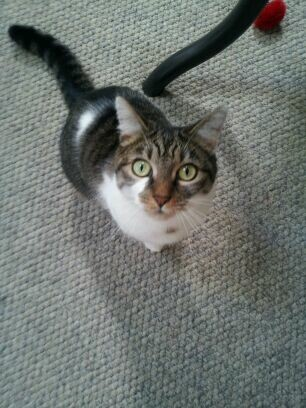

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 

key = "insert your key here"
url = 'https://api.thecatapi.com/v1/images/search'

params = {"api-key": key}
data = requests.get(url, params=params)
js = json.loads(data.content)
response = requests.get(js[0]['url'])

with open('cat.jpg', 'wb') as f:
        f.write(response.content)

Image('cat.jpg', width=500)

### API KEYS - EXERCISE 1

Read the NY Times docs to search for books by Michelle Obama. Then print the name of the book.

In [ ]:
#insert 1

### API KEYS - EXERCISE 2

Search for the bestsellers of NONFICTION. Then create a loop to print all of the title names.

In [ ]:
#insert 2

### API KEYS - EXERCISE 3

Read the Cat API docs to figure out how to search for a breed list. Then write a loop that prints each breed's name.

In [ ]:
#insert 3

### API KEYS - EXERCISE 4
Read the Cat API docs to figure out how to view an image of a bengal cat specifically. 

In [ ]:
#insert 4

OAUTH
---
<a class="anchor" id="oauth"></a>

Sometimes, a vendor requires more security than just an API key. The vendor wants increased assurance of the source of the requests and so they add expect you to send cryptographically signed messages using shared keys and secrets. A very common technology that is used to sign requests over the Internet is called OAuth. You can read more about the OAuth protocol at http://www.oauth.net.

As the Twitter API became increasingly valuable, Twitter went from an open and public API to an API that required the use of OAuth signatures on each API request. Thankfully there are still a number of convenient and free OAuth libraries so you can avoid writing an OAuth implementation from scratch by reading the specification. For Twitter, we'll use the package tweepy.




You will also need a Twitter account and four special Twitter passwords. 

A.First, create a Twitter account AND make sure you have verified your phone number with Twitter (ugh).

B.Then, go to https://apps.twitter.com/ and create new app.

C.The name and description don't matter, they just need to be a certain length. You can list your school's website as the url (starting with http://).  You can leave the callback url blank. When it asks you to describe your purpose and how you'll analyze the data, you can copy and paste the following:

"I am a high school student at Oregon Episcopal School. The name of the class that I am in is Computer & Data Science. I'm learning about how to talk to APIs and would like to use the Twitter API to analyze Donald Trump's Tweets for an assignment. We will look at what times of day he tweets most often and what his most often used words are.

We'll use the Twitter AP for a final project to analyze Donald Trump's Tweets for an assignment. We will look at what times of day he tweets most often and what his most often used words are.  I will use the package Tweepy to obtain Donald Trump's recent tweets. Then we'll use the Python package matplotlib to make histograms of what times of day and what days of week he tweets most. I'll also break up his tweets into words to make a word cloud of his most used words. This analysis will only be discussed in class as a lesson on using APIs, it won't be posted anywhere."

D.Now go to Keys and Access Tokens and scroll down to Create My Access Token:

<img src="twitter1.png" style="width: 300px;"/>
<img src="twitter2.png" style="width: 300px;"/>

E.You should now have a Consumer Key (API Key), a Consumer Secret (API Secret), an Access Token, and an Access Token Secret. Create a hidden.py file in this same directory that contains your secret info in the following form:

```python
def oauth() :
    return {"consumer_key": "insert here",
        "consumer_secret" : "insert here",
        "access_token" : "insert here",
        "access_token_secret" : "insert here"  }
        ```
        
Save it and then run this line:

In [58]:
import hidden
secret = hidden.oauth()
consumer_key = secret["consumer_key"]
consumer_secret = secret["consumer_secret"]
access_token = secret["access_token"]
access_token_secret = secret["access_token_secret"]

The Twitter web service are accessed using a URL like this:

https://api.twitter.com/1.1/statuses/user_timeline.json

But once all of the security information has been added, the URL will look more like:

https://api.twitter.com/1.1/statuses/user_timeline.json?count=2&oauth_version=1.0&oauth_token=101...SGI&screen_name=drchuck&oauth_nonce=09239679&oauth_timestamp=1380395644&oauth_signature=rLK...BoD&oauth_consumer_key=h7Lu...GNg&oauth_signature_method=HMAC-SHA1

F.To download tweepy, type into your terminal:

pip install tweepy

or 

conda install -c conda-forge tweepy

Now, the following package should be able to be imported:

In [ ]:
import tweepy

If everything is entered correctly, you should now be able to get Donald Trump's followers count and his latest tweet and tweet time:

In [59]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
user = api.get_user('realDonaldTrump')
print(user.followers_count)
print(user.status.text)
print(user.status.created_at)

60300209
Today, it was my great honor to address the the National Association of REALTORS! https://t.co/LQNExa57ne
2019-05-17 19:41:59


If you wanted his last 3200 something tweets, you could type:

In [61]:
user = 'realDonaldTrump'
for i, status in enumerate(tweepy.Cursor(api.user_timeline, id=user, count = 100).items()):
    print(i, status.text)

0 Today, it was my great honor to address the the National Association of REALTORS! https://t.co/LQNExa57ne
1 With all of the Fake and Made Up News out there, Iran can have no idea what is actually going on!
2 It now seems the General Flynn was under investigation long before was common knowledge. It would have been impossi… https://t.co/Yrigs5s8TE
3 The Fake News Media is hurting our Country with its fraudulent and highly inaccurate coverage of Iran. It is scatte… https://t.co/L7YyPBbkqV
4 Will Jerry Nadler ever look into the fact that Crooked Hillary deleted and acid washed 33,000 emails AFTER getting… https://t.co/MhJtCsfEER
5 My Campaign for President was conclusively spied on. Nothing like this has ever happened in American Politics. A re… https://t.co/pE1wwgJDnb
6 New Fox Poll: 58% of people say that the FBI broke the law in investigating Donald J. Trump. @foxandfriends
7 MAKE AMERICA GREAT AGAIN!
8 DRAIN THE SWAMP!
9 “What happened is that Donald Trump won. Down goes Comey.” @fo

100 RT @realDonaldTrump: I think that China felt they were being beaten so badly in the recent negotiation that they may as well wait around fo…
101 RT @realDonaldTrump: ....The only problem is that they know I am going to win (best economy &amp; employment numbers in U.S. history, &amp; much mo…
102 RT @TomFitton: Democratic leaders don't want to talk about the criminal conspiracy their party was involved in related to the illegal spyin…
103 RT @GOPChairwoman: An Ohio manufacturing CEO explains that cracking down on China has meant stability and predictability for his business.…
104 I was NOT going to fire Bob Mueller, and did not fire Bob Mueller. In fact, he was allowed to finish his Report wit… https://t.co/zA8t2HRD6X
105 ....The only problem is that they know I am going to win (best economy &amp; employment numbers in U.S. history, &amp; much… https://t.co/BNvYmzFr4R
106 I think that China felt they were being beaten so badly in the recent negotiation that they may as well wait ar

200 RT @HouseGOP: D's bill on the floor today has nothing to do w/ pre-existing conditions. 

But it will prevent states from reducing the pric…
201 RT @DanCrenshawTX: We reached a new low in deceitful politics today. 

The lies about protection for pre-existing conditions continue. 

Th…
202 RT @VP: Great to be at R&amp;J Johnson Farms in  Glyndon, Minnesota today! Since the earliest days of our administration, @POTUS has promised t…
203 House Republicans should not vote for the BAD DEMOCRAT Disaster Supplemental Bill which hurts our States, Farmers &amp;… https://t.co/4IEVqECbd7
204 Today, it was my honor to welcome the 2018 World Series Champion Boston @RedSox to the @WhiteHouse! https://t.co/yHAClpttLM
205 Great news today: My Administration just secured a historic donation of HIV prevention drugs from Gilead to help ex… https://t.co/UrRHsUJ20v
206 After a great rally in Panama City Beach, Florida - I am returning to Washington, D.C. with @SenRickScott and Senat… https://t.co/FNnJA

300 RT @realDonaldTrump: So great to watch this! https://t.co/pYoiLjM0pz
301 When will the Radical Left Wing Media apologize to me for knowingly getting the Russia Collusion Delusion story so… https://t.co/O3oT1YjvMd
302 RT @PrisonPlanet: “Dangerous”.

My opinions?

Or giving a handful of giant partisan corporations the power to decide who has free speech?…
303 RT @iheartmindy: So James Woods was kicked off Twitter for quoting Ralph Waldo Emerson...but @TalbertSwan the racist fake man of God, that’…
304 RT @Lauren_Southern: Lmao at establishment conservatives who think they won’t be labeled the new “dangerous” / “extremist” voices when thos…
305 RT @JeremyDBoreing: Those suggesting Facebook can ban anyone for any reason because they are a private company do not understand the platfo…
306 RT @SharylAttkisson: When did we decide, as Americans, that it's ok fo govt &amp; 3d parties to censor/ curate our info? That we cannot be trus…
307 RT @SharylAttkisson: When did we quit teaching/under

400 RT @cmd629: @dbongino Yea right, until they get in the voting booth!
401 RT @JeffNeely11: @dbongino No, we don't support Crazy Joe!! And our members in our Local are up in arms!
402 RT @bobahide: @dbongino Not I
403 RT @JeffreyKStewart: @dbongino Just the union leadership supports Biden. Members support Trump. This applies to most unions.
404 RT @Korryb: @dbongino I certainly won't be voting for this guy!
405 RT @woofeous: @dbongino "Over Charging Union Dues Alert". Dan, how about Union leadership opening up books to own members since they have s…
406 RT @mscrosswi: @dbongino Nowhere have I heard the firefighters were supporting Joe Biden. The leadership of the firefighters union, on the…
407 RT @wadar1969: @dbongino The union bureaucrats endorse him but the due paying members don’t, and they wonder why unions are getting smaller…
408 RT @JA_Loans: @dbongino Does he know 90% of the Firemen’s retirement is dependent on the US Economy and invested in US Stock? Do not think…
409 RT @C

498 ....Congress has no time to legislate, they only want to continue the Witch Hunt, which I have already won. They sh… https://t.co/SR99p1tb72
499 No Collusion, No Obstruction - there has NEVER been a President who has been more transparent. Millions of pages of… https://t.co/v8HpsttkC5
500 Can anyone comprehend what a GREAT job Border Patrol and Law Enforcement is doing on our Southern Border. So far th… https://t.co/G13GJJCTeV
501 .....are there no “High Crimes and Misdemeanors,” there are no Crimes by me at all. All of the Crimes were committe… https://t.co/CfcpFiyym7
502 The Mueller Report, despite being written by Angry Democrats and Trump Haters, and with unlimited money behind it (… https://t.co/P0Xq2h0Boq
503 Mexico’s Soldiers recently pulled guns on our National Guard Soldiers, probably as a diversionary tactic for drug s… https://t.co/bpPOy93S7x
504 A very big Caravan of over 20,000 people started up through Mexico. It has been reduced in size by Mexico but is st… https://t

598 RT @seanhannity: Mueller’s Final Report ‘Completely Vindicates’ President Trump 👇 https://t.co/t97JxHWdji
599 RT @marklevinshow: More on the phony collusion scam https://t.co/pYwRe1ojNI
600 RT @RepMattGaetz: “You have guys that come through here that do this for a living…they bring groups across, they bring drugs across.”

Sher…
601 RT @TeamCavuto: .@RepMarkMeadows It's a good day for America and it's a good day for the President https://t.co/z2mpJu2JWJ
602 Time for Democrats to accept reality https://t.co/3SyAnkSVlX
603 RT @ScottFantasy: @jdawsey1 This is why nobody but the @DNC circle jerk takes this seriously anymore.  That front page is a disgrace but in…
604 The Washington Post and New York Times are, in my opinion, two of the most dishonest media outlets around. Truly, t… https://t.co/wyogohR0yb
605 RT @JudicialWatch: JWPrez @TomFitton  Mueller Report Confirms Russia Hoax, NEW Deep State Lawsuit, John Kerry Colluding w/ Iran? https://t.…
606 ....big, fat, waste of time, energ

698 “Democrats don’t like the results of the Mueller Report, so now they’re trying everything else.”  @RepDougCollins… https://t.co/h3fRcRxges
699 President Obama’s top White House lawyer, Gregory B. Craig, was indicted yesterday on very serious charges. This is… https://t.co/AOhzdnlZh2
700 “I don’t need to know any more. We’re done, absolutely done, he (Mueller) tried the case. There’s NO COLLUSION.”… https://t.co/h19nJpADbS
701 JOBLESS CLAIMS AT 50 YEAR LOW!
702 RT @chuckwoolery: President Trump continues to tally up wins for our country as Americans just saw the best income gains in over 50 years.…
703 RT @DailyCaller: Every CNN Presidential Town Hall Finished Behind MSNBC And Fox News In Ratings https://t.co/muDZgLT4u7
704 RT @DailyCaller: Rod Rosenstein Defends Attorney General’s Handling Of Mueller Report https://t.co/qMmzaPYrK4
705 “And the Radical Dems reeling in disarray as the President continues to Win, Win and Win again! The Left is PRETEND… https://t.co/7cMUVrghOr
706 RT @

798 “Trolling the Mueller Report. Democrats Lost On Collusion. Now They’re Inventing A Coverup.” @WSJopinion  James Freeman @LouDobbs
799 I am pleased to announce that Jovita Carranza will be nominated as the new @SBAgov Administrator. She will be repla… https://t.co/1O1AX2OB5P
800 .@ByronYork: “How bad does border have to be for Democrats to admit it's an emergency?” https://t.co/6LOPQQEKtP
801 “Conservative support for Trump wall soars to 99 percent” https://t.co/Tblpox8Nsg
802 “Democrats need to help fix the border crisis or get out of Trump’s way” https://t.co/IlQ8rbjlfg
803 Thank you @Trish_Regan! https://t.co/6CyCpHnR6x
804 WELCOME BACK JOE! https://t.co/b2NbBSX3sx
805 The New York Times had no legitimate sources, which would be totally illegal, concerning the Mueller Report. In fac… https://t.co/WIVW5z1oFN
806 There is nothing we can ever give to the Democrats that will make them happy. This is the highest level of Presiden… https://t.co/OfWBGuPQPk
807 According to polling, few 

898 Today, it was my great honor to welcome Prime Minister @Netanyahu of Israel back to the @WhiteHouse where I signed… https://t.co/ao9uGgzVfM
899 https://t.co/G4RNXzoWqc
900 https://t.co/DAT0cT72WX
901 RT @realDonaldTrump: Good Morning, Have A Great Day!
902 RT @realDonaldTrump: No Collusion, No Obstruction, Complete and Total EXONERATION. KEEP AMERICA GREAT!
903 RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN!
904 “Breaking News: Mueller Report Finds No Trump-Russia Conspiracy.” @MSNBC
905 “The Special Counsel did not find that the Trump Campaign, or anyone associated with it, conspired or coordinated w… https://t.co/zL3wrjdlho
906 “No matter your ideologies or your loyalties, this is a good day for America. No American conspired to cooperate wi… https://t.co/edKqmSVKG9
907 No Collusion, No Obstruction, Complete and Total EXONERATION. KEEP AMERICA GREAT!
908 MAKE AMERICA GREAT AGAIN!
909 Good Morning, Have A Great Day!
910 Today in Florida, @FLOTUS and I were honored to welcome and me

998 RT @realDonaldTrump: ....should never have been appointed and there should be no Mueller Report. This was an illegal &amp; conflicted investiga…
999 RT @realDonaldTrump: So, if there was knowingly &amp; acknowledged to be “zero” crime when the Special Counsel was appointed, and if the appoin…
1000 RT @realDonaldTrump: “New evidence that the Obama era team of the FBI, DOJ &amp; CIA were working together to Spy on (and take out) President T…
1001 How is the Paris Environmental Accord working out for France? After 18 weeks of rioting by the Yellow Vest Proteste… https://t.co/GIfPBvVS75
1002 Google is helping China and their military, but not the U.S. Terrible! The good news is that they helped Crooked Hi… https://t.co/HZR9VdsBgg
1003 Because the economy is so good, General Motors must get their Lordstown, Ohio, plant open, maybe in a different for… https://t.co/bOCWl9EA2U
1004 Spreading the fake and totally discredited Dossier “is unfortunately a very dark stain against John McCain.” 

1098 Despite the most hostile and corrupt media in the history of American politics, the Trump Administration has accomp… https://t.co/dEdKTZfecj
1099 RT @WhiteHouse: “Public optimism in their personal economy has hit a 16-year high under President Trump."

“The job market doesn’t get much…
1100 RT @mike_pence: Great to be in Kentucky! I’m proud to stand with @MattBevin who is working tirelessly for the great people of the Bluegrass…
1101 “Donald Trump’s Approval Rating is at or near his highest level ever. The media is not being honest about what is h… https://t.co/zVnmGwryu1
1102 RT @TomFitton: .@JudicialWatch uncovers major Ohr-Steele-Fusion GPS collusion docs PLUS did Schiff conspire with Cohen to smear @RealDonald…
1103 RT @WhiteHouse: Economic security is national security. 

That's the principle at work as President @realDonaldTrump helps our veterans tra…
1104 RT @GOPChairwoman: Since the mainstream media doesn’t cover the booming @realDonaldTrump economy enough:

-Wage growth 

1198 ....President. We are WINNING big, the envy of the WORLD, but just think what it could be?
1199 Presidential Harassment by “crazed” Democrats at the highest level in the history of our Country. Likewise, the mos… https://t.co/Fc1hRFAZzz
1200 The reason I do not want military drills with South Korea is to save hundreds of millions of dollars for the U.S. f… https://t.co/ETpO9DGEHm
1201 My wonderful daughter, Ivanka, will be interviewed tonight by Steve Hilton on “The Next Revolution.” @FoxNews 9:00… https://t.co/nPfvBjzHEY
1202 “Look how they’re acting now and how we act when we’re in the majority. What the Democrats are doing is an abuse of… https://t.co/7itNecWLVr
1203 After more than two years of Presidential Harassment, the only things that have been proven is that Democrats and o… https://t.co/fbKeXoF5G5
1204 ...said was a total lie, but Fake Media won’t show it. I am an innocent man being persecuted by some very bad, conf… https://t.co/FJVrHNHCNc
1205 https://t.co/PTLqvZNwqY


1298 Highly respected Senator Richard Burr, head of Senate Intelligence, said, after interviewing over 200 witnesses and… https://t.co/So0qm3SrYv
1299 RT @FLOTUS: Wonderful evening at @WhiteHouse celebrating #AfricanAmericanHistoryMonth! https://t.co/ZBJop8kxTY
1300 We are here to honor the extraordinary contributions of African-Americans to every aspect of American Life, History… https://t.co/51s1YX9Oq8
1301 Senator John Cornyn has done an outstanding job for the people of Texas. He is strong on Crime, the Border, the Sec… https://t.co/gxJLXzB5Ax
1302 .@JussieSmollett - what about MAGA and the tens of millions of people you insulted with your racist and dangerous comments!? #MAGA
1303 THE WALL IS UNDER CONSTRUCTION RIGHT NOW! https://t.co/exUJCiITsz
1304 ....something that is so obviously the future. I want the United States to win through competition, not by blocking… https://t.co/hztqUt8v9S
1305 I want 5G, and even 6G, technology in the United States as soon as possible. It is far m

1398 The Democrats are so self righteous and ANGRY! Loosen up and have some fun. The Country is doing well!
1399 The Democrats do not want us to detain, or send back, criminal aliens! This is a brand new demand. Crazy!
1400 No president ever worked harder than me (cleaning up the mess I inherited)!
1401 “Fact checkers have become Fake News.” @JesseBWatters   So True!
1402 RT @realDonaldTrump: Working hard, thank you! https://t.co/tnuHnw8kll
1403 The U.S. will soon control 100% of ISIS territory in Syria. @CNN (do you believe this?).
1404 RT @club4growth: WE AGREE! The time is now! 👉 "The time has come to pass school choice for America's children." - @realDonaldTrump #SOTU
1405 RT @club4growth: Agreed! Senate needs to confirm @realDonaldTrump Admin appointees. #SOTU
1406 Well, it happened again. Amy Klobuchar announced that she is running for President, talking proudly of fighting glo… https://t.co/ovrOxCny9h
1407 The Border Committee Democrats are behaving, all of a sudden, irrationall

1498 “Our economy, right now, is the Gold Standard throughout the World.” @IngrahamAngle  So true, and not even close!
1499 A low level staffer that I hardly knew named Cliff Sims wrote yet another boring book based on made up stories and… https://t.co/SGN2UN9Ohw
1500 How does Da Nang Dick (Blumenthal) serve on the Senate Judiciary Committee when he defrauded the American people ab… https://t.co/JBKLZ66qx6
1501 In the beautiful Midwest, windchill temperatures are reaching minus 60 degrees, the coldest ever recorded. In comin… https://t.co/FnaCaBA5Nz
1502 “In the Media’s effort to destroy the President, they are actually destroying themselves. Given all of the tremendo… https://t.co/yXteAEPz17
1503 Howard Schultz doesn’t have the “guts” to run for President! Watched him on @60Minutes last night and I agree with… https://t.co/aSYufhX25J
1504 Numerous states introducing Bible Literacy classes, giving students the option of studying the Bible. Starting to make a turn back? Great!
1505 Tari

1598 RT @sendavidperdue: President Trump again spoke directly to the American people about the national security crisis at our southern border.…
1599 RT @marklevinshow: I strongly support President Trump’s immigration proposal today.  Pelosi &amp; Schumer rejected it even before the president…
1600 RT @GOPLeader: President Trump has put forward a serious and reasonable offer to reform parts of our broken immigration system and reopen g…
1601 RT @GOP: “I commend the President for his leadership in proposing this bold solution to reopen the government, secure the border, and take…
1602 RT @GOPChairwoman: Spot on. 
https://t.co/DnD5JlkdFb
1603 RT @charliekirk11: Breaking:

A new NPR/PBS NewsHour/Marist poll shows Hispanic-Latino approval of President Donald Trump’s job performance…
1604 https://t.co/yQkCrpooIT
1605 The Media is not giving us credit for the tremendous progress we have made with North Korea. Think of where we were… https://t.co/get2afE329
1606 Thank you David! https://t.co/

1722 .@CNN called a San Diego news station (@KUSINews) for negative reports on the Wall. When the station said that Wall… https://t.co/nigpO3Oixw
1723 Drug prices declined in 2018, the first time in nearly half a century. During the first 19 months of my Administrat… https://t.co/xx4B9lKTx8
1724 I look forward to hosting, right out of the great State of South Carolina, the 2019 NCAA Football Champion Clemson… https://t.co/IByyRxfwYa
1725 RT @WhiteHouse: This is common sense. Congress must pass a bill that ends the crisis at our border. https://t.co/wD0PPKfpNM
1726 RT @WhiteHouse: This afternoon, President Trump hosted a roundtable discussion with State, local, and community leaders, who spoke on how t…
1727 The Fake News Media keeps saying we haven’t built any NEW WALL. Below is a section just completed on the Border. An… https://t.co/2RqbrNEznu
1728 ...The Steel Barrier, or Wall, should have been built by previous administrations long ago. They never got it done… https://t.co/SsrUV1HM

1798 ....President Trump deserves a lot of credit, but again, you have the anti-Trump people who are not going to give him a lot of credit.”
1799 Michael Pillsbury interviewed by @cvpayne: “They have the motive of making the President look bad – instead of Pres… https://t.co/LN0PdWVXca
1800 https://t.co/jsOrDtwdEa
1801 The RNC has a great Chairwoman in Ronna McDaniel and the @GOP has never been stronger. We achieved historic wins wi… https://t.co/HvxTc0GyYv
1802 https://t.co/JzfXMAPwKP
1803 The United States Treasury has taken in MANY billions of dollars from the Tariffs we are charging China and other c… https://t.co/pPMP10Birv
1804 The Shutdown is only because of the 2020 Presidential Election. The Democrats know they can’t win based on all of t… https://t.co/8CnsuJW3jM
1805 “MAGA list: 205 ‘historic results’ help Trump make case for 2020 re-election” https://t.co/vtqnUwdhjB
1806 Sadly, there can be no REAL Border Security without the Wall!
1807 ...I remain ready and willing to work 

1898 The only way to stop drugs, gangs, human trafficking, criminal elements and much else from coming into our Country… https://t.co/h1sNn3D4yW
1899 When President Obama ingloriously fired Jim Mattis, I gave him a second chance. Some thought I shouldn’t, I thought… https://t.co/ZFYIzOOXZg
1900 If anybody but your favorite President, Donald J. Trump, announced that, after decimating ISIS in Syria, we were go… https://t.co/BNlBGpUobj
1901 Brett McGurk, who I do not know, was appointed by President Obama in 2015. Was supposed to leave in February but he… https://t.co/WihasoF1ss
1902 I will not be going to Florida because of the Shutdown - Staying in the White House!  #MAGA
1903 Senate adjourns until December 27th.
1904 I won an election, said to be one of the greatest of all time, based on getting out of endless &amp; costly foreign war… https://t.co/ytXyO6q5yE
1905 The crisis of illegal activity at our Southern Border is real and will not stop until we build a great Steel Barrie… https:

2083 ....in the world. I want clean air and clean water and have been making great strides in improving America’s enviro… https://t.co/iQ4aLjD0Kb
2084 I am glad that my friend @EmmanuelMacron and the protestors in Paris have agreed with the conclusion I reached two… https://t.co/YcxKsnDGwt
2085 RT @charliekirk11: There are riots in socialist France because of radical leftist fuel taxes

Media barely mentioning this

America is boom…
2086 Could somebody please explain to the Democrats (we need their votes) that our Country losses 250 Billion Dollars a… https://t.co/Z8nKReskdg
2087 .....But if a fair deal is able to be made with China, one that does all of the many things we know must be finally… https://t.co/VMfAQjVXmz
2088 ....I am a Tariff Man. When people or countries come in to raid the great wealth of our Nation, I want them to pay… https://t.co/fj8Bwjgywu
2089 ......on seeing whether or not a REAL deal with China is actually possible. If it is, we will get it done. China is… https

2197 Brutal and Extended Cold Blast could shatter ALL RECORDS - Whatever happened to Global Warming?
2198 RT @realDonaldTrump: MAKE AMERICA GREAT AGAIN!
2199 RT @realDonaldTrump: AMERICA FIRST!
2200 “79% of these decisions have been overturned in the 9th Circuit.” @FoxNews  A terrible, costly and dangerous disgra… https://t.co/0fvZgB3qwG
2201 There are a lot of CRIMINALS in the Caravan. We will stop them. Catch and Detain! Judicial Activism, by people who… https://t.co/BwGiNXe6R0
2202 “Thank you to President Trump on the Border. No American President has ever done this before.” Hector Garza, National Border Patrol Council
2203 .....are so many opposing view (on Border and Safety) cases filed there, and why are a vast number of those cases o… https://t.co/JlyYHGX2SR
2204 Sorry Chief Justice John Roberts, but you do indeed have “Obama judges,” and they have a much different point of vi… https://t.co/gIByfadPmu
2205 Great new book out, “Mad Politics: Keeping Your Sanity in a World Gone Cr

2297 Rick Scott was up by 50,000+ votes on Election Day, now they “found” many votes and he is only up 15,000 votes. “Th… https://t.co/W9X2AC3anj
2298 Jeff Flake(y) doesn’t want to protect the Non-Senate confirmed Special Counsel, he wants to protect his future afte… https://t.co/BwxZf2gCDH
2299 As soon as Democrats sent their best Election stealing lawyer, Marc Elias, to Broward County they miraculously star… https://t.co/0pPBAq3duq
2300 You mean they are just now finding votes in Florida and Georgia – but the Election was on Tuesday? Let’s blame the… https://t.co/F9ky8vupIB
2301 .@BrianKempGA ran a great race in Georgia – he won. It is time to move on!
2302 “Presidential Proclamation Addressing Mass Migration Through the Southern Border of the United States” https://t.co/9blzn1XGyS
2303 Law Enforcement is looking into another big corruption scandal having to do with Election Fraud in #Broward and Pal… https://t.co/I402nKjfb1
2304 ....Great bravery shown by police. California Highway 

2397 New Fox Poll shows a “40% Approval Rating by African Americans for President Trump, a record for Republicans.” Thank you, a great honor!
2398 Unbelievable crowd in Florida tonight. Get out and VOTE! #MAGA🇺🇸 https://t.co/zpLkAko8If
2399 If you want to protect criminal aliens – VOTE DEMOCRAT. If you want to protect Law-Abiding Americans – VOTE REPUBLI… https://t.co/uBBspeV0YP
2400 .@DannyTarkanian is a great guy and a team player. He will represent his District, State and Country at the highest… https://t.co/KVIL8bfPDr
2401 Another fantastic #MAGARally tonight in the Great State of Florida. In just 3 days, the People of Florida are going… https://t.co/ehgVlvptIj
2402 Heading to Pensacola, Florida - will be there soon. Amazing lines of people wanting to get in - what a crowd! Is th… https://t.co/KlKYIRCvqN
2403 Governor @DougDucey of Arizona is doing a great job. Doug is strong on Crime, the Border, and our Second Amendment.… https://t.co/WesGJubW6i
2404 ....Lake Okeechobee and all o

2497 Martha McSally is a great warrior, her opponent a Nancy Pelosi Wacko! https://t.co/QEUdPWDDud
2498 RT @GOPChairwoman: .@realDonaldTrump is delivering results for all Americans, and it’s inspiring our future leaders to get involved in the…
2499 Thank you Charlie! https://t.co/U2Nt1h7A3X
2500 Good luck Mary! https://t.co/qEBpqS0vli
2501 A big change is coming - don’t want the Dems anymore! https://t.co/O6wp2gjPUY
2502 Trump Thunders at Media for Smearing His Supporters after Bomb Scares https://t.co/Ggdhs9reY3 via @BreitbartNews
2503 Fantastic evening in Charlotte, North Carolina with great PATRIOTS. Get out and VOTE for @buddforcongress and… https://t.co/spTpBEIwXP
2504 If you meet every day with optimism – if you confront every obstacle with determination – if you refuse to give up,… https://t.co/rtdXOVFafv
2505 It was my great honor, thank you! https://t.co/U2Nt1hpaVv
2506 Whether you are African-American, Hispanic-American or ANY AMERICAN at all – you have the right to live in a

2643 “Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Grea… https://t.co/PkrqjqPf6y
2644 Incredible number just out, 7,036,000 job openings. Astonishing - it’s all working! Stock Market up big on tremendo… https://t.co/S5OTMBWObn
2645 For the record, I have no financial interests in Saudi Arabia (or Russia, for that matter). Any suggestion that I h… https://t.co/O5uI7mY3pQ
2646 “8X more new manufacturing jobs now than with Obama.” @FoxNews  @cvpayne
2647 The United States has strongly informed the President of Honduras that if the large Caravan of people heading to th… https://t.co/2m5jEZroOD
2648 “Op-Ed praises Trump Administrations efforts at the Border.” @FoxNews  The  Washington Examiner States, “Finally, t… https://t.co/XPdA865LiQ
2649 Thank you to the Cherokee Nation for revealing that Elizabeth Warren, sometimes referred to as Pocahontas, is a complete and total Fraud!
2650 Now that her claims of being of Indian herit

2796 Thank you Mississippi - Together, we are MAKING AMERICA GREAT AGAIN! https://t.co/npnRirjcFG
2797 Today, my Administration provided HISTORIC levels of funding to improve school safety through STOP School Violence… https://t.co/oON7wPgrfA
2798 “National wage growth is at the highest it’s been in nearly 17 months -- and, according to a new study released by… https://t.co/gpwphLJ17a
2799 GOD BLESS THE U.S.A.! #MAGA🇺🇸 https://t.co/pquqyy5S3G
2800 Thank you Mississippi - I love you! https://t.co/eH6x1NBNQG
2801 This is really an incredible time for our Nation - WE are RESPECTED AGAIN! https://t.co/94KusYcDAj
2802 RT @WhiteHouse: “America will always be a nation of great builders, because in America, we honor work, we honor grit, we honor craftsmanshi…
2803 “USMCA Wins Praise as a Victory for American Industries and Workers”➡️https://t.co/UWhPhNXiiL https://t.co/eBVv0nXXRT
2804 Proud of our great First Lady - and she loves doing this! https://t.co/VD7wlqeJoR
2805 Yesterday, it was my gr

2894 AMERICA IS WINNING AGAIN! https://t.co/6HcBjLAAQB
2895 Thank you Las Vegas, Nevada - I love you! #MAGA🇺🇸 https://t.co/GBZO84PyQ1
2896 MAKE AMERICA GREAT AGAIN!
https://t.co/OYJUkiEUid
2897 Landing in Las Vegas now for a Make America Great Again Rally supporting @DeanHeller and @DannyTarkanian. Also doin… https://t.co/nlm7h6xTt6
2898 https://t.co/LdXQb42Imc
2899 On my way to Las Vegas, Nevada. Look forward to seeing everyone tonight! #MAGA https://t.co/wTeerIUJvd
2900 https://t.co/RzqoiQ4SmD
2901 ...North Korea to be identified as a result of my Summit with Chairman Kim. These HEROES are home, they may Rest In… https://t.co/z9XxPhsDnv
2902 Army Master Sgt. Charles H. McDaniel, 32, of Vernon, Indiana, and Army Pfc. William H. Jones, 19, of Nash County, N… https://t.co/oLmSJEZnlS
2903 Congratulations to my good friend Prime Minister @AbeShinzo on his HUGE election victory in Japan. I’m looking forw… https://t.co/ghipsRro5u
2904 .@JayWebberNJ is running for Congress in the 11th Distri

2994 RT @NHC_Atlantic: NEW: #Hurricane #Florence has made landfall near Wrightsville Beach, North Carolina at 7:15 AM EDT (1115 UTC) with estima…
2995 Incredible job being done by FEMA, First Responders, Law Enforcement and all. Thank you!
2996 RT @USNationalGuard: Today, nearly 3,000 National Guard members from Guam, Hawaii, Maryland, North Carolina, South Carolina and Virginia ar…
2997 RT @fema: We have created a rumor control page for Hurricane #Florence that will be updated regularly. During disasters, it’s critical to a…
2998 RT @FEMAespanol: Hoy es el último día para desalojar. Si está en la ruta de #Florence, escuche a las autoridades locales para órdenes de de…
2999 RT @RedCross: We are on the ground helping prepare for #HurricaneFlorence. More than 1,600 people spent last night in 36 Red Cross and comm…
3000 RT @HHSGov: If you're ordered to evacuate ahead of #HurricaneFlorence: 

➡️ Take only essential items 
➡️ Turn off the gas, electricity, an…
3001 RT @fema: If you're in a 

3101 Under our horrible immigration laws, the Government is frequently blocked from deporting criminal aliens with viole… https://t.co/h6CTfAJIp4
3102 The Woodward book is a scam. I don’t talk the way I am quoted. If I did I would not have been elected President. Th… https://t.co/IAewOgdm7H
3103 Matt Rosendale will be a Great Senator from a Great State, Montana! He is a fighter who will be tough on Crime and… https://t.co/P0olff4xtW
3104 What was Nike thinking?
3105 Thank you Montana, I love you! https://t.co/9J4Xv2PoNw
3106 MAKE AMERICA GREAT AGAIN! https://t.co/RPOYiqsHHH
3107 Getting ready to go on stage for Matt Rosendale, who will be a great Senator. Jon Tester has let the people of Mont… https://t.co/q1aNBf0dF4
3108 Landing in Montana now to support Matt Rosendale for U.S. Senate! #MAGA https://t.co/0MIEyWxMbW
3109 Are the investigative “journalists” of the New York Times going to investigate themselves - who is the anonymous letter writer?
3110 Look forward to seeing everyone in

Notice that if you print a full tweet, it contains massive amounts of info. You can find all of the attributes that Twitter is listing here: https://dev.twitter.com/rest/reference/get/statuses/user_timeline

In [62]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
user = api.get_user('realDonaldTrump')
print(user)

User(_api=<tweepy.api.API object at 0x10f506b00>, _json={'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'profile_location': None, 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/OMxB0x7xC5', 'entities': {'url': {'urls': [{'url': 'https://t.co/OMxB0x7xC5', 'expanded_url': 'http://www.Instagram.com/realDonaldTrump', 'display_url': 'Instagram.com/realDonaldTrump', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 60300284, 'friends_count': 46, 'listed_count': 103140, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'favourites_count': 7, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 41911, 'lang': 'en', 'status': {'created_at': 'Fri May 17 19:41:59 +0000 2019', 'id': 1129472149339693062, 'id_str': '1129472149339693062', 'text': 'Today, it was my great honor to address the the Nat

### Exercise - Donald 
Print out his screen_name, description, followers count, and friends count.

In [ ]:
#insert 1

### Exercise - Donald 2
Pull of the year of his most recent tweet using datetime.

In [ ]:
#insert 2

### Exercise - Celebrity
Print out the last 20 tweets of your favorite celebrity. (Just the text).

In [ ]:
#insert celebrity

### Exercise - Celebrity 2
Print out the dates of your celebrity's last 20 tweets.

In [ ]:
#insert celebrity 2